In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
train_data = ImageDataGenerator(rescale=1/255)
test_data = ImageDataGenerator(rescale=1/255)

In [8]:
train_path = "/content/drive/MyDrive/Colab material/DL Dataset/Practical 7/brain_tumor/Training"
test_path = "/content/drive/MyDrive/Colab material/DL Dataset/Practical 7/brain_tumor/Testing"

In [10]:
train = train_data.flow_from_directory(
    train_path,
    target_size=(224,224),
    batch_size=64,
    class_mode="categorical"
)

Found 2870 images belonging to 4 classes.


In [16]:
classes = [x for x in train.class_indices.keys()]
classes

['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

In [11]:
test = test_data.flow_from_directory(
    test_path,
    target_size=(224,224),
    batch_size=64,
    class_mode="categorical"
)

Found 394 images belonging to 4 classes.


In [33]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32,(3,3),activation="relu",input_shape=(224,224,3)),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Conv2D(64,(3,3),activation="relu",input_shape=(224,224,3)),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Conv2D(64,(3,3),activation="relu",input_shape=(224,224,3)),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Conv2D(32,(3,3),activation="relu",input_shape=(224,224,3)),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Flatten(),

    keras.layers.Dense(128,activation="relu"),
    keras.layers.Dense(4,activation="softmax")
])

In [34]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)                   │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 52, 52, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 24, 24, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │         589,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 665,252 (2.54 MB)

 Trainable params: 665,252 (2.54 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:
model.compile(optimizer="sgd",loss="categorical_crossentropy",metrics=["accuracy"])

In [36]:
report = model.fit(train,epochs=5,validation_data=test)

Epoch 1/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 339s 7s/step - accuracy: 0.3369 - loss: 1.3608 - val_accuracy: 0.2513 - val_loss: 1.4317
Epoch 2/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 343s 8s/step - accuracy: 0.5153 - loss: 1.2130 - val_accuracy: 0.2411 - val_loss: 1.7039
Epoch 3/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 384s 8s/step - accuracy: 0.5546 - loss: 1.0658 - val_accuracy: 0.2157 - val_loss: 2.0379
Epoch 4/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 339s 7s/step - accuracy: 0.5993 - loss: 0.9920 - val_accuracy: 0.2640 - val_loss: 1.8950
Epoch 5/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 345s 8s/step - accuracy: 0.6071 - loss: 0.9253 - val_accuracy: 0.2792 - val_loss: 2.1074


<ipython-input-37-54ae57a8893f>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


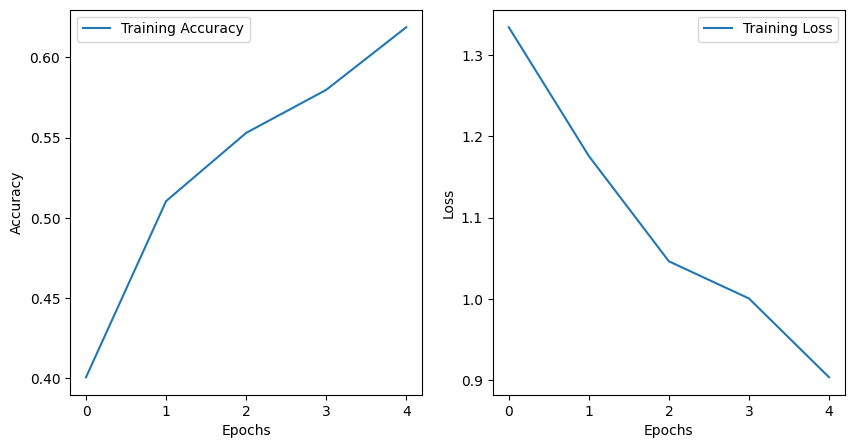

In [37]:
plt.figure(figsize=(10,5))
plt.title("Model Performance")
plt.subplot(1,2,1)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(report.history['accuracy'], label='Training Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.xlabel('Epochs')
plt.ylabel('Score')
plt.plot(report.history['loss'], label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [38]:
def softmax_to_category(x):
  return np.argmax(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


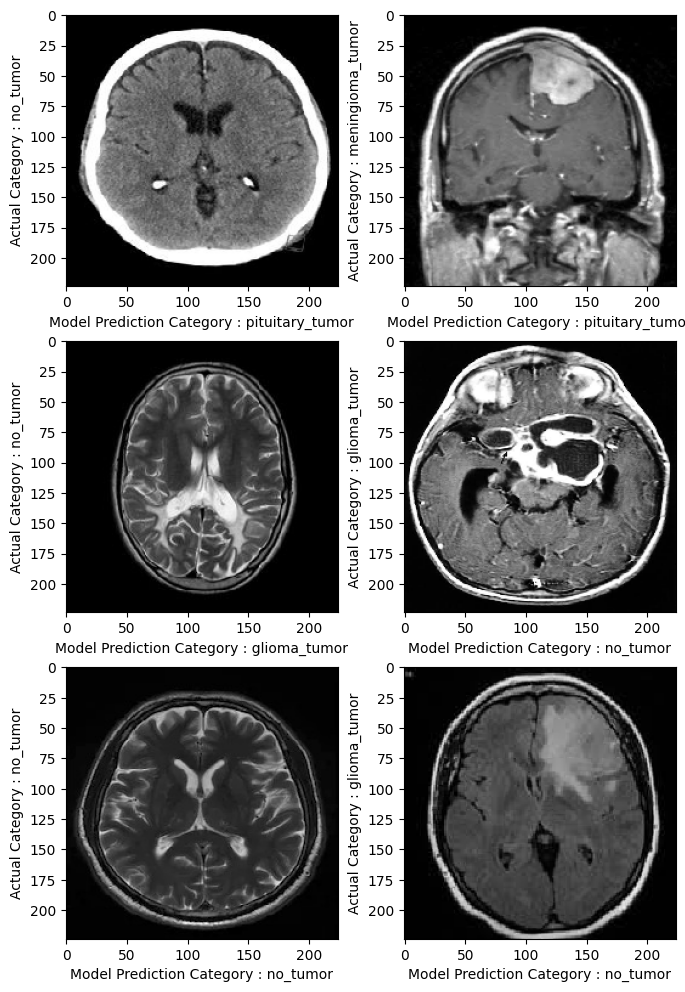

In [47]:
plt.figure(figsize=(8,12))

for x in range(6, 12):
  plt.subplot(3, 2, x + 1 - 6)
  # Reshape the image to add a batch dimension
  image = test[0][0][x]
  image = np.expand_dims(image, axis=0)  # Add batch dimension

  plt.xlabel(f"Model Prediction Category : {classes[softmax_to_category(model.predict(image))]}")
  plt.ylabel(f"Actual Category : {classes[softmax_to_category(test[0][1][x])]}")
  plt.imshow(test[0][0][x])